# 서울시 업무추진비 분석
https://opengov.seoul.go.kr/expense
https://github.com/seoul-opengov/opengov

## 0. 한글폰트 설치 후 진행

### 1) 한글폰트 설치
- 설치 후 '런타임 다시 시작'

In [1]:
! apt-get update
! apt-get install -y fonts-nanum
! fc-cache -fv
! rm ~/.cache/matplotlib -rf

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:15 http://se

### 2) 한글 폰트 사용

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['axes.unicode_minus'] = False

plt.rc('font' , family = 'NanumBarunGothic')

## 1. 데이터 수집

In [2]:
import warnings
warnings.filterwarnings('ignore')

### 1) 파일 다운로드 함수 정의
  - 1. github 경로 지정
  - 2. 다운로드 폴더 지정
  - 3. 다운로드 폴더 확인 또는 생성
  - 4. 1월~12월 업무추진비 파일 다운로드

In [5]:
import requests
import os
import pathlib

def get_seoul_expense_list(extension, year, data_folder) :

  # 01
  expense_list_year_url = 'http://github.com/seoul-opengov/opengov/raw/master/expense_list' + str(year) + '/'

  # 02
  expense_list_year_dir = data_folder + str(year) + '/'

  # 03
  if (os.path.isdir(expense_list_year_dir)) :
    print("폴더({0})가 존재합니다. {0}년 데이터의 다운로드를 시작합니다." .format(year))
  else :
    print("폴더({0})를 생성합니다. {0}년 데이터의 다운로드를 시작합니다." .format(year))
    pathlib.Path(expense_list_year_dir).mkdir(parents = True, exist_ok = True)

  # 04
  for k in range(12) :
    file_name = '{0}{1:02d}_expense_list.{2}' .format(year, k+1, extension)
    url = expense_list_year_url + file_name
    print(url)
    r = requests.get(url)

    with open(expense_list_year_dir + file_name , 'wb') as f:
      f.write(r.content)


### 2) 함수 실행 옵션
- 파일 타입 지정
- 연도 지정(2017~2020)
- 폴더 지정

In [6]:
extension = "csv"
years = [2017, 2018, 2019, 2020]
data_folder = 'data_folder_'

### 3) 파일 다운로드 함수 실행

In [7]:
for year in years :
  get_seoul_expense_list(extension, year, data_folder)

폴더(2017)를 생성합니다. 2017년 데이터의 다운로드를 시작합니다.
http://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201701_expense_list.csv
http://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201702_expense_list.csv
http://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201703_expense_list.csv
http://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201704_expense_list.csv
http://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201705_expense_list.csv
http://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201706_expense_list.csv
http://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201707_expense_list.csv
http://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201708_expense_list.csv
http://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201709_expense_list.csv
http://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201710_expense_list.csv
http://github.com/seoul-opengov/opengov

### 4) 다운로드 결과 확인

In [8]:
! ls -l data_folder_*

data_folder_2017:
total 27016
-rw-r--r-- 1 root root 2101932 Feb 24 06:34 201701_expense_list.csv
-rw-r--r-- 1 root root 2191463 Feb 24 06:34 201702_expense_list.csv
-rw-r--r-- 1 root root 2320233 Feb 24 06:34 201703_expense_list.csv
-rw-r--r-- 1 root root 2064545 Feb 24 06:34 201704_expense_list.csv
-rw-r--r-- 1 root root 2072997 Feb 24 06:34 201705_expense_list.csv
-rw-r--r-- 1 root root 2436396 Feb 24 06:34 201706_expense_list.csv
-rw-r--r-- 1 root root 2274618 Feb 24 06:34 201707_expense_list.csv
-rw-r--r-- 1 root root 2271758 Feb 24 06:34 201708_expense_list.csv
-rw-r--r-- 1 root root 2297135 Feb 24 06:34 201709_expense_list.csv
-rw-r--r-- 1 root root 2043312 Feb 24 06:34 201710_expense_list.csv
-rw-r--r-- 1 root root 2600188 Feb 24 06:34 201711_expense_list.csv
-rw-r--r-- 1 root root 2962735 Feb 24 06:34 201712_expense_list.csv

data_folder_2018:
total 28672
-rw-r--r-- 1 root root 2384105 Feb 24 06:34 201801_expense_list.csv
-rw-r--r-- 1 root root 2140712 Feb 24 06:34 201802_expe

## 2. 데이터 전처리

### 1) 파일 구조 및 정보 확인
- 파일 한개 사용

In [9]:
import pandas as pd

df = pd.read_csv('data_folder_2017/201701_expense_list.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nid                5517 non-null   int64  
 1   title              5517 non-null   object 
 2   url                5517 non-null   object 
 3   dept_nm_lvl_1      5517 non-null   object 
 4   dept_nm_lvl_2      5517 non-null   object 
 5   dept_nm_lvl_3      4842 non-null   object 
 6   dept_nm_lvl_4      1350 non-null   object 
 7   dept_nm_lvl_5      252 non-null    object 
 8   exec_yr            5517 non-null   int64  
 9   exec_month         5517 non-null   int64  
 10  expense_budget     274 non-null    float64
 11  expense_execution  202 non-null    float64
 12  category           115 non-null    object 
 13  dept_nm_full       5517 non-null   object 
 14  exec_dt            5517 non-null   object 
 15  exec_loc           5467 non-null   object 
 16  exec_purpose       5516 

### 2) 함수 정의
- 열(Columns) 이름 확인

In [10]:
df.columns

Index(['nid', 'title', 'url', 'dept_nm_lvl_1', 'dept_nm_lvl_2',
       'dept_nm_lvl_3', 'dept_nm_lvl_4', 'dept_nm_lvl_5', 'exec_yr',
       'exec_month', 'expense_budget', 'expense_execution', 'category',
       'dept_nm_full', 'exec_dt', 'exec_loc', 'exec_purpose', 'target_nm',
       'payment_method', 'exec_amount'],
      dtype='object')

- 열(Column) 이름 변경 함수

In [11]:
def change_csv_file_first_line_value(old_file_name, new_file_name) :

  # 읽기 모드 열기
  with open(old_file_name, encoding = 'utf-8') as f:
    # 한줄씩 lines 리스트의 각 요소에 할당
    lines = f.read().splitlines()

  # 변경할 열(Column) 이름 지정
    lines[0] = 'nid,제목,url,부서레벨1,부서레벨2,부서레벨3,부서레벨4,\
부서레벨5,집행연도,집행월,예산,집행,구분,부서명,\
집행일시,집행장소,집행목적,대상인원,결제방법,집행금액'
    
  # 쓰기 모드 열기
  with open(new_file_name, 'w', encoding = 'utf-8') as f:  
    # 리스트 각 요소 개행문자(\n)로 연결해서 파일 저장
    f.write('\n'.join(lines))

- '_new'추가한 새파일 저장 함수

In [12]:
# 인자: 연도, 데이터 파일이 있는 폴더
def change_year_csv_file_first_line_value(year, data_folder): 

    # 파일 폴더 지정
    expense_list_year_dir = data_folder + str(year) + '/'
    
    # 확장자 이름
    extension = 'csv' 
    
    # 지정한 폴더에 있는 월별 업무추진비 파일에서 첫 번째 줄의 열 이름을 변경 
    for k in range(12):
        # 기존 파일 이름
        old_file_name = expense_list_year_dir + '{0}{1:02d}_expense_list.{2}'.format(year, k+1, extension) 
        
        # 새파일 이름
        new_file_name = expense_list_year_dir + '{0}{1:02d}_expense_list_new.{2}'.format(year, k+1, extension) 
  
        # 열(Column) 이름 변경 함수
        change_csv_file_first_line_value(old_file_name, new_file_name)

### 3) 함수 적용

In [13]:
data_folder = 'data_folder_'

years = [2017, 2018, 2019, 2020]

for year in years:
    print("{}년 데이터의 첫 번째 줄의 열 이름을 변경해서 새 파일에 저장합니다.".format(year))
    change_year_csv_file_first_line_value(year, data_folder)

print("모든 데이터의 첫 번째 줄의 열 이름을 변경해서 새 파일로 저장했습니다.")

2017년 데이터의 첫 번째 줄의 열 이름을 변경해서 새 파일에 저장합니다.
2018년 데이터의 첫 번째 줄의 열 이름을 변경해서 새 파일에 저장합니다.
2019년 데이터의 첫 번째 줄의 열 이름을 변경해서 새 파일에 저장합니다.
2020년 데이터의 첫 번째 줄의 열 이름을 변경해서 새 파일에 저장합니다.
모든 데이터의 첫 번째 줄의 열 이름을 변경해서 새 파일로 저장했습니다.


In [14]:
! ls -l data_folder_*/*new.csv

-rw-r--r-- 1 root root 2101920 Feb 24 06:43 data_folder_2017/201701_expense_list_new.csv
-rw-r--r-- 1 root root 2191451 Feb 24 06:43 data_folder_2017/201702_expense_list_new.csv
-rw-r--r-- 1 root root 2320221 Feb 24 06:43 data_folder_2017/201703_expense_list_new.csv
-rw-r--r-- 1 root root 2064533 Feb 24 06:43 data_folder_2017/201704_expense_list_new.csv
-rw-r--r-- 1 root root 2072985 Feb 24 06:43 data_folder_2017/201705_expense_list_new.csv
-rw-r--r-- 1 root root 2436384 Feb 24 06:43 data_folder_2017/201706_expense_list_new.csv
-rw-r--r-- 1 root root 2274606 Feb 24 06:43 data_folder_2017/201707_expense_list_new.csv
-rw-r--r-- 1 root root 2271746 Feb 24 06:43 data_folder_2017/201708_expense_list_new.csv
-rw-r--r-- 1 root root 2297123 Feb 24 06:43 data_folder_2017/201709_expense_list_new.csv
-rw-r--r-- 1 root root 2043300 Feb 24 06:43 data_folder_2017/201710_expense_list_new.csv
-rw-r--r-- 1 root root 2600176 Feb 24 06:43 data_folder_2017/201711_expense_list_new.csv
-rw-r--r-- 1 root roo

- 열(Column) 이름 변경 확인

In [15]:
df_new = pd.read_csv('data_folder_2017/201701_expense_list_new.csv')

df.columns, df_new.columns

(Index(['nid', 'title', 'url', 'dept_nm_lvl_1', 'dept_nm_lvl_2',
        'dept_nm_lvl_3', 'dept_nm_lvl_4', 'dept_nm_lvl_5', 'exec_yr',
        'exec_month', 'expense_budget', 'expense_execution', 'category',
        'dept_nm_full', 'exec_dt', 'exec_loc', 'exec_purpose', 'target_nm',
        'payment_method', 'exec_amount'],
       dtype='object'),
 Index(['nid', '제목', 'url', '부서레벨1', '부서레벨2', '부서레벨3', '부서레벨4', '부서레벨5', '집행연도',
        '집행월', '예산', '집행', '구분', '부서명', '집행일시', '집행장소', '집행목적', '대상인원', '결제방법',
        '집행금액'],
       dtype='object'))

### 4) 결측치 확인
- .info() 적용

In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   nid     5517 non-null   int64  
 1   제목      5517 non-null   object 
 2   url     5517 non-null   object 
 3   부서레벨1   5517 non-null   object 
 4   부서레벨2   5517 non-null   object 
 5   부서레벨3   4842 non-null   object 
 6   부서레벨4   1350 non-null   object 
 7   부서레벨5   252 non-null    object 
 8   집행연도    5517 non-null   int64  
 9   집행월     5517 non-null   int64  
 10  예산      274 non-null    float64
 11  집행      202 non-null    float64
 12  구분      115 non-null    object 
 13  부서명     5517 non-null   object 
 14  집행일시    5517 non-null   object 
 15  집행장소    5467 non-null   object 
 16  집행목적    5516 non-null   object 
 17  대상인원    5486 non-null   object 
 18  결제방법    5514 non-null   object 
 19  집행금액    5517 non-null   int64  
dtypes: float64(2), int64(4), object(14)
memory usage: 862.2+ KB


- isna() 적용
  - '부서레벨3', '부서레벨4', '부서레벨5', '예산', '집행', '구분'

In [17]:
df_new.isna().sum(axis = 0)

nid         0
제목          0
url         0
부서레벨1       0
부서레벨2       0
부서레벨3     675
부서레벨4    4167
부서레벨5    5265
집행연도        0
집행월         0
예산       5243
집행       5315
구분       5402
부서명         0
집행일시        0
집행장소       50
집행목적        1
대상인원       31
결제방법        3
집행금액        0
dtype: int64

### 5) 연도별 파일 통합
- 파일 통합 함수 정의

In [18]:
def select_columns_save_file(year, data_folder, drop_columns_list):
    
    expense_list_year_dir = data_folder + str(year) + '/'
    expense_list_tidy_file = "{}_expense_list_tidy.csv".format(year)
    df_year = pd.DataFrame()
    
    for k in range(12):
        # 새파일 이름 지정
        file_name = "{0}{1:02d}_expense_list_new.csv".format(year, k+1)
        
        # DtaFrame 형식으로 csv 데이터 불러오기
        df_month = pd.read_csv(expense_list_year_dir + file_name)
        
        # df_month 새로 추가해서 df_year에 다시 할당
        df_year = df_year.append(df_month, ignore_index = True)
        
    df_year_drop = df_year.drop(columns = drop_columns_list)
    new_file_name = expense_list_year_dir + expense_list_tidy_file
    df_year_drop.to_csv(new_file_name, index = False)
    
    print("==> {} 파일 생성".format(expense_list_tidy_file))

- 함수 실행 옵션

In [19]:
data_folder = 'data_folder_'

years = [2017, 2018, 2019, 2020]

drop_columns_list = ['nid', 'url', '부서레벨3', '부서레벨4', '부서레벨5', '예산', '집행', '구분']

- 파일 통합 함수 실행

In [20]:
for year in years:
    print("{}년 파일 통합중...".format(year))
    select_columns_save_file(year, data_folder, drop_columns_list)
print("파일 통합 완료.")

2017년 파일 통합중...
==> 2017_expense_list_tidy.csv 파일 생성
2018년 파일 통합중...
==> 2018_expense_list_tidy.csv 파일 생성
2019년 파일 통합중...
==> 2019_expense_list_tidy.csv 파일 생성
2020년 파일 통합중...
==> 2020_expense_list_tidy.csv 파일 생성
파일 통합 완료.


- 생성된 통합 파일 확인

In [21]:
! ls -l data_folder_*/*tidy*

-rw-r--r-- 1 root root 21435432 Feb 24 06:47 data_folder_2017/2017_expense_list_tidy.csv
-rw-r--r-- 1 root root 22940371 Feb 24 06:47 data_folder_2018/2018_expense_list_tidy.csv
-rw-r--r-- 1 root root 24385017 Feb 24 06:47 data_folder_2019/2019_expense_list_tidy.csv
-rw-r--r-- 1 root root 23985064 Feb 24 06:47 data_folder_2020/2020_expense_list_tidy.csv


- 2017 통합 파일 정보

In [22]:
df_2017 = pd.read_csv('data_folder_2017/2017_expense_list_tidy.csv')

df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70132 entries, 0 to 70131
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제목      70132 non-null  object
 1   부서레벨1   70132 non-null  object
 2   부서레벨2   70074 non-null  object
 3   집행연도    70132 non-null  int64 
 4   집행월     70132 non-null  int64 
 5   부서명     70053 non-null  object
 6   집행일시    70132 non-null  object
 7   집행장소    69360 non-null  object
 8   집행목적    70110 non-null  object
 9   대상인원    69597 non-null  object
 10  결제방법    69929 non-null  object
 11  집행금액    70132 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 6.4+ MB


### 6) 전체 파일 통합
- DataFrame: df_expense_all

In [23]:
import pandas as pd

In [24]:
data_folder = 'data_folder_'

years = [2017, 2018, 2019, 2020]

df_expense_all = pd.DataFrame()


for year in years:
    expense_list_year_dir = data_folder + str(year) + '/'
    expense_list_tidy_file = "{}_expense_list_tidy.csv".format(year)
    
    path_file_name = expense_list_year_dir + expense_list_tidy_file
    
    df_expense = pd.read_csv(path_file_name)
    df_expense_all = df_expense_all.append(df_expense, ignore_index = True)

- 전체 통합 DataFrame 확인

In [25]:
df_expense_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286562 entries, 0 to 286561
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   제목      286562 non-null  object
 1   부서레벨1   286562 non-null  object
 2   부서레벨2   286278 non-null  object
 3   집행연도    286562 non-null  int64 
 4   집행월     286562 non-null  int64 
 5   부서명     286483 non-null  object
 6   집행일시    286562 non-null  object
 7   집행장소    283825 non-null  object
 8   집행목적    286540 non-null  object
 9   대상인원    285167 non-null  object
 10  결제방법    286359 non-null  object
 11  집행금액    286562 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 26.2+ MB


In [26]:
df_expense_all.to_csv('seoulExpense.csv')

## 3. 데이터 분석

### 1) 연도별 집행횟수
- 연도별.value_count()

In [27]:
year_trend = df_expense_all['집행연도'].value_counts()

year_trend

2019    74207
2018    72218
2017    70132
2020    70005
Name: 집행연도, dtype: int64

- 막대그래프 시각화

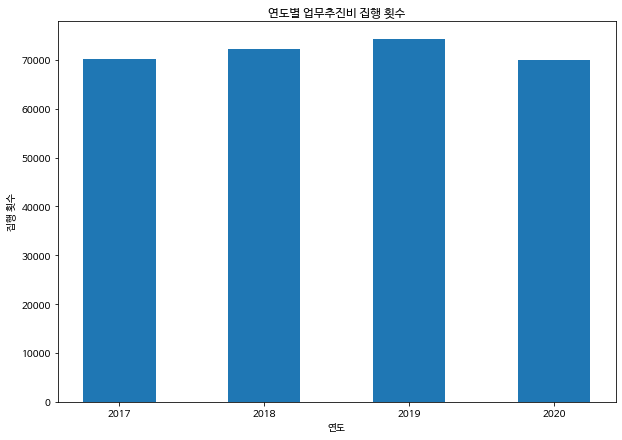

In [28]:
import matplotlib.pyplot as plt
import matplotlib

plt.figure(figsize = (10, 7))
plt.bar(year_trend.index, year_trend.values, 
        tick_label = year_trend.index, 
        width = 0.5)
plt.title("연도별 업무추진비 집행 횟수")
plt.xlabel("연도")
plt.ylabel("집행 횟수")
plt.show()

### 2) 연도별 집행금액
- 연도별.pibot_table()

In [29]:
year_total = pd.pivot_table(df_expense_all, 
                            index = ['집행연도'], 
                            values = ['집행금액'], 
                            aggfunc = sum)

year_total

,집행금액
집행연도,
2017,9076941387
2018,9937556542
2019,10532330632
2020,9569969608


- 막대그래프 시각화

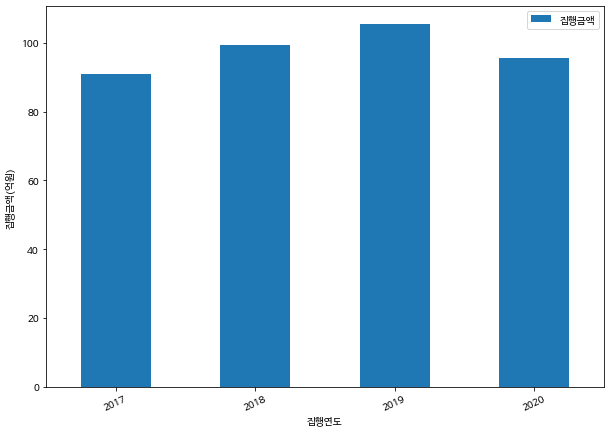

In [30]:
(year_total/100000000).plot.bar(rot = 25, figsize = (10, 7))
plt.ylabel('집행금액(억원)')
plt.show()

### 3) 월별 집행금액
- 월별 .pivot_table()

In [31]:
month_total = pd.pivot_table(df_expense_all, 
                             index = ['집행월'], 
                             values = ['집행금액'], 
                             aggfunc = sum)

month_total

,집행금액
집행월,
1,3105200774
2,3009867115
3,2975144064
4,2904420469
5,2835444798
6,3135376077
7,3187708934
8,2741709260
9,3171985846


- 연별/월별 .pivot_table()

In [32]:
year_month_total = pd.pivot_table(df_expense_all, 
                                  index = ['집행월'], 
                                  columns = ['집행연도'], 
                                  values = ['집행금액'], 
                                  aggfunc = sum)

year_month_total

집행금액                                    
집행연도        2017        2018        2019        2020
집행월                                                 
1      710368860   735587570   882512749   776731595
2      712679864   769360005   768931868   758895378
3      737250454   761059010   816280447   660554153
4      635265805   703781418   814657376   750715870
5      647582378   669044701   747256509   771561210
6      758257342   690652154   775945999   910520582
7      701604626   788926477   881725566   815452265
8      661174850   730290532   762251087   587992791
9      806170700   769404957   841641708   754768481
10     637219943   827022975   861865780   740067938
11     843619171   960310221   915992092   837076658
12    1225747394  1532116522  1463269451  1205632687

- 막대그래프 시각화

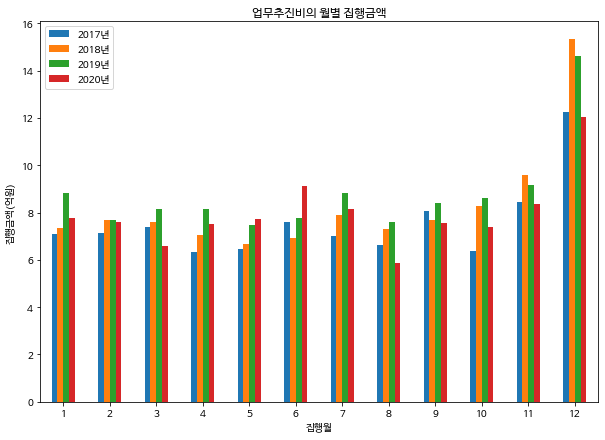

In [33]:
(year_month_total/100000000).plot.bar(rot = 0, figsize = (10, 7))
plt.ylabel('집행금액(억원)')
plt.title("업무추진비의 월별 집행금액")
plt.legend(['2017년', '2018년', '2019년', '2020년'])
plt.show()

### 4) 부서별 집행금액
- 부서별_level1 .pivot_table()

In [34]:
dept_level1_total = pd.pivot_table(df_expense_all, 
                                   index = ['부서레벨1'], 
                                   values = ['집행금액'], 
                                   aggfunc = sum)

dept_level1_total

,집행금액
부서레벨1,
사업소,8818243192
서울시본청,21648914435
소방재난본부(소방서),6895346543
의회사무처,1754293999


- 부서별_level2 .pivot_table()

In [35]:
dept_level2_total = pd.pivot_table(df_expense_all, 
                                   index = ['부서레벨2'], 
                                   values = ['집행금액'], 
                                   aggfunc = sum)

dept_level2_total

,집행금액
부서레벨2,
119특수구조단,154656050
감사위원회,458681910
강남소방서,294361660
강동소방서,250082280
강북소방서,224225980
...,...
행정2부시장,571189418
행정국,1680607984
행정자치위원회,76298340


- 집행금액별 오름차순 정렬

In [37]:
dept_level2_total_top10 = dept_level2_total.sort_values(by = ['집행금액'], ascending = False)[0:10]

dept_level2_total_top10

,집행금액
부서레벨2,
상수도사업본부,2847687268
기획조정실,2034746588
행정국,1680607984
시민소통기획관,1131749644
서울특별시장,1123172470
도시기반시설본부,809241594
정무부시장,752471802
행정1부시장,713975128
기후환경본부,675882042


- 막대그래프 시각화

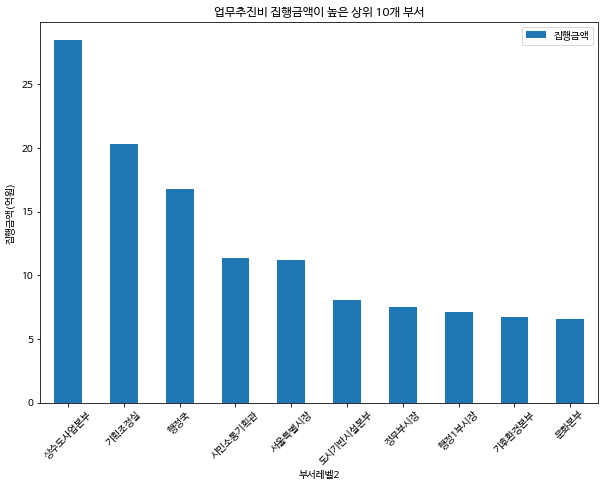

In [38]:
(dept_level2_total_top10/100000000).plot.bar(rot = 45, figsize = (10, 7))
plt.ylabel('집행금액(억원)')
plt.title("업무추진비 집행금액이 높은 상위 10개 부서")
plt.show()

- 워드클라우드 시각화

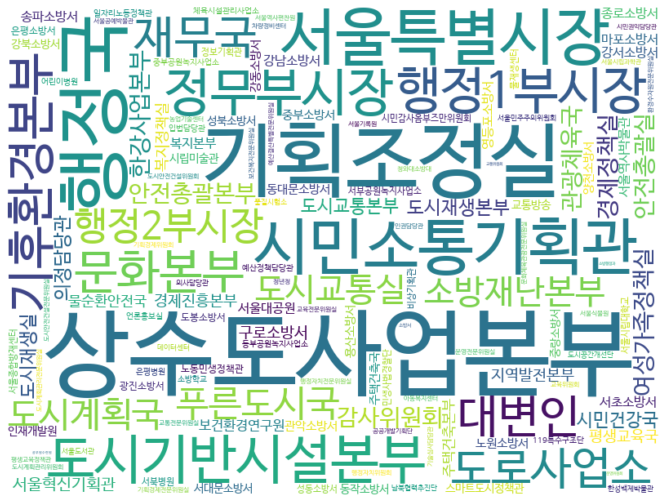

In [39]:
from wordcloud import WordCloud

korean_font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

wc = WordCloud(font_path = korean_font_path, 
               background_color='white',
               width = 800, height = 600)

frequencies = dept_level2_total['집행금액']

wordcloud_image = wc.generate_from_frequencies(frequencies)

plt.figure(figsize=(14, 9))
plt.axis('off')
plt.imshow(wordcloud_image, interpolation = 'bilinear')
plt.show()

### 5) 요일별 집행횟수
- 시간정보 확인

In [40]:
df_expense_all['집행일시'].values

array(['2017-01-26 13:10', '2017-01-25 22:41', '2017-01-24 12:35', ...,
       '2020-12-09 14:09', '2020-12-04 11:46', '2020-12-04 13:00'],
      dtype=object)

- pd.to_datetime() 변환

In [41]:
expense_date_time = pd.to_datetime(df_expense_all['집행일시'])

expense_date_time.values

array(['2017-01-26T13:10:00.000000000', '2017-01-25T22:41:00.000000000',
       '2017-01-24T12:35:00.000000000', ...,
       '2020-12-09T14:09:00.000000000', '2020-12-04T11:46:00.000000000',
       '2020-12-04T13:00:00.000000000'], dtype='datetime64[ns]')

- '집행일시_요일' 행(Column) 추가
  - dt.weekday: 날짜를 요일로 변환

In [42]:
week_day_name = ['월', '화', '수', '목', '금', '토', '일']

df_expense_all['집행일시_요일'] = [week_day_name[weekday] for weekday in expense_date_time.dt.weekday]

- 추가 정보 확인

In [43]:
df_expense_all.head()

,제목,부서레벨1,부서레벨2,집행연도,집행월,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액,집행일시_요일
0,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-26 13:10,동해일식 (중구 무교동),기본소득과 장애인복지 논의간담회,장애인복지정책팀장 외 2명,카드,76000,목
1,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-25 22:41,김앤장 (중구 무교로),장애인단체 활동지원 논의간담회,장애인복지정책과장 외 3명,카드,102000,수
2,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-24 12:35,왕왕생고기 (중구 을지로),장애인 기본돌봄 복지시책 논의간담회,장애인복지정책팀장외7명,카드,80000,화
3,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-24 12:23,서울불고기 (중구 남대문로),서울시일자리통합지원센터 운영개선 논의간담회,장애인복지정책과장외5명,카드,112000,화
4,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-23 15:10,서울시청신매점,부서운영에 필요한 음료수 구매,장애인복지정책과직원,카드,16000,월


- 요일별 집행횟수 확인

In [44]:
expense_weekday = df_expense_all['집행일시_요일'].value_counts()

expense_weekday

목    60200
화    58635
수    56680
금    53593
월    52568
토     2751
일     2135
Name: 집행일시_요일, dtype: int64

- 요일순 정렬: .reindex()

In [45]:
expense_weekday = expense_weekday.reindex(index = week_day_name)

expense_weekday

월    52568
화    58635
수    56680
목    60200
금    53593
토     2751
일     2135
Name: 집행일시_요일, dtype: int64

- 막대그래프 시각화

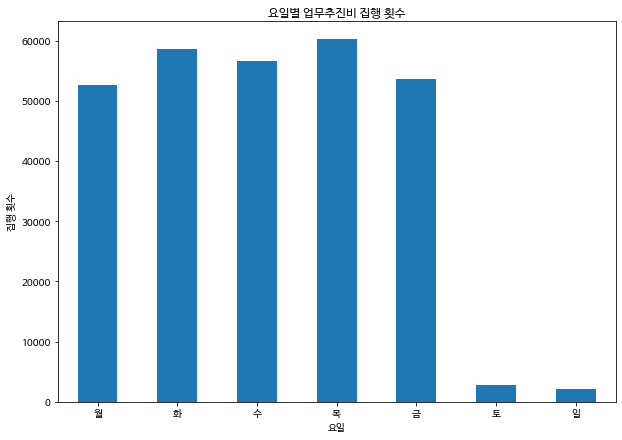

In [46]:
expense_weekday.plot.bar(rot = 0, figsize = (10, 7))
plt.title("요일별 업무추진비 집행 횟수")
plt.xlabel("요일")
plt.ylabel("집행 횟수")
plt.show()

### 6) 시간별 집행횟수
- '집행일시_시간' 행(Column) 추가
  - dt.hour : 날짜를 시간으로 변환

In [48]:
df_expense_all['집행일시_시간'] = [hour for hour in expense_date_time.dt.hour]

- 추가정보 확인

In [49]:
df_expense_all.head()

,제목,부서레벨1,부서레벨2,집행연도,집행월,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액,집행일시_요일,집행일시_시간
0,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-26 13:10,동해일식 (중구 무교동),기본소득과 장애인복지 논의간담회,장애인복지정책팀장 외 2명,카드,76000,목,13
1,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-25 22:41,김앤장 (중구 무교로),장애인단체 활동지원 논의간담회,장애인복지정책과장 외 3명,카드,102000,수,22
2,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-24 12:35,왕왕생고기 (중구 을지로),장애인 기본돌봄 복지시책 논의간담회,장애인복지정책팀장외7명,카드,80000,화,12
3,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-24 12:23,서울불고기 (중구 남대문로),서울시일자리통합지원센터 운영개선 논의간담회,장애인복지정책과장외5명,카드,112000,화,12
4,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-23 15:10,서울시청신매점,부서운영에 필요한 음료수 구매,장애인복지정책과직원,카드,16000,월,15


- 시간별 집행횟수 확인

In [50]:
expense_hour_num = df_expense_all['집행일시_시간'].value_counts()

expense_hour_num

12    118219
20     28600
13     27510
19     20646
21     15052
11     12411
14     11671
15      9934
10      7941
18      7450
16      6940
0       6277
9       4984
17      3934
22      3039
8       1132
7        477
23       144
6         52
1         52
3         29
4         27
5         21
2         20
Name: 집행일시_시간, dtype: int64

- 시간순 정렬: .reindex()
  - 8시 기준

In [51]:
work_hour = [ (k+8)%24 for k in range(24)]
expense_hour_num = expense_hour_num.reindex(index = work_hour)

expense_hour_num

8       1132
9       4984
10      7941
11     12411
12    118219
13     27510
14     11671
15      9934
16      6940
17      3934
18      7450
19     20646
20     28600
21     15052
22      3039
23       144
0       6277
1         52
2         20
3         29
4         27
5         21
6         52
7        477
Name: 집행일시_시간, dtype: int64

- 막대그래프 시각화

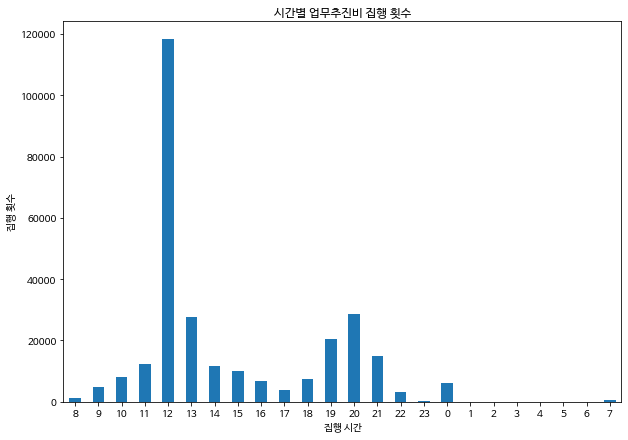

In [52]:
expense_hour_num.plot.bar(rot = 0, figsize = (10, 7))
plt.title("시간별 업무추진비 집행 횟수")
plt.xlabel("집행 시간")
plt.ylabel("집행 횟수")
plt.show()

### 7) 시간별 집행금액
- 시간별 .pivot_table()

In [53]:
expense_hour_total = pd.pivot_table(df_expense_all, 
                                    index = ['집행일시_시간'],
                                    values = ['집행금액'], 
                                    aggfunc = sum)

expense_hour_total.head()

,집행금액
집행일시_시간,
0,1096337666
1,8970161
2,2715190
3,7671262
4,5868431


- 막대그래프 시각화

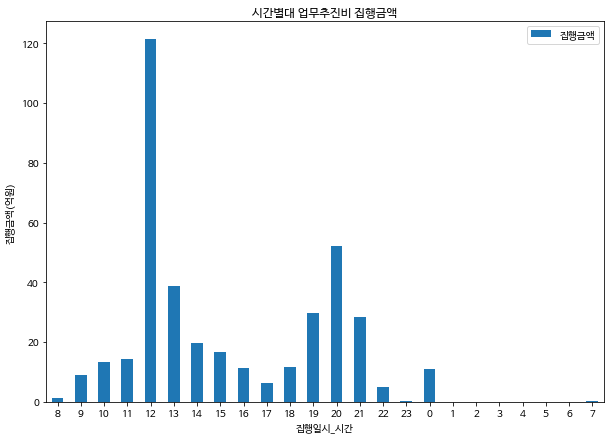

In [54]:
expense_hour_total = expense_hour_total.reindex(index = work_hour)

(expense_hour_total/100000000).plot.bar(rot = 0, figsize = (10, 7))
plt.ylabel('집행금액(억원)')
plt.title("시간별대 업무추진비 집행금액")
plt.show()